In [173]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
latitude = 41.01
longitude = 28.97

start_date = "2025-06-01"
end_date = "2025-06-30"

url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&daily=temperature_2m_max,temperature_2m_min,windspeed_10m_max,relative_humidity_2m_max,relative_humidity_2m_min,weathercode&start_date={start_date}&end_date={end_date}&timezone=auto"
response = requests.get(url)
data = response.json()

df = pd.DataFrame({
    "date": data["daily"]["time"],
    "temp_max": data["daily"]["temperature_2m_max"],
    "temp_min": data["daily"]["temperature_2m_min"],
    "humidity_max": data["daily"]["relative_humidity_2m_max"],
    "humidity_min": data["daily"]["relative_humidity_2m_min"],
    "wind_speed_m_s": data["daily"]["windspeed_10m_max"],
    "weather_code": data["daily"]["weathercode"]
   
})
df["wind_speed_km_h"] = df["wind_speed_m_s"] * 3.6

df["avg_temp"]= (df["temp_max"] + df["temp_min"] )/ 2
df

,date,temp_max,temp_min,humidity_max,humidity_min,wind_speed_m_s,weather_code,wind_speed_km_h,avg_temp
0,2025-06-01,24.1,15.0,94,42,18.3,53,65.88,19.55
1,2025-06-02,26.4,14.4,96,31,11.1,51,39.96,20.40
2,2025-06-03,29.6,15.0,85,28,9.8,0,35.28,22.30
3,2025-06-04,31.5,18.0,74,27,9.8,0,35.28,24.75
4,2025-06-05,30.4,20.9,65,30,19.1,0,68.76,25.65
5,2025-06-06,28.1,18.6,90,41,20.1,0,72.36,23.35
6,2025-06-07,26.4,17.9,92,47,19.3,3,69.48,22.15
7,2025-06-08,26.9,17.4,94,44,15.6,3,56.16,22.15
8,2025-06-09,27.7,17.9,95,31,17.8,3,64.08,22.80
9,2025-06-10,27.5,18.6,98,55,25.9,3,93.24,23.05


In [165]:
number_of_row=df.shape[0]
number_of_collumn=df.shape[1]

print(f"number of rows: {number_of_row}")
print(f"number of collumns: {number_of_collumn}")

number of row: 30
number of collumn: 12


In [157]:
df.dtypes

date               datetime64[ns]
temp_max                  float64
temp_min                  float64
humidity_max                int64
humidity_min                int64
wind_speed_m_s            float64
weather_code                int64
wind_speed_km_h           float64
avg_temp                  float64
weather_summary            object
wind_category              object
avg_humidity              float64
dtype: object

In [159]:
df.describe()

,date,temp_max,temp_min,humidity_max,humidity_min,wind_speed_m_s,weather_code,wind_speed_km_h,avg_temp,avg_humidity
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2025-06-15 12:00:00,28.903333,18.433333,82.833333,33.500000,17.436667,11.400000,62.772000,23.668333,58.166667
min,2025-06-01 00:00:00,24.100000,14.400000,56.000000,16.000000,8.300000,0.000000,29.880000,19.550000,38.500000
25%,2025-06-08 06:00:00,26.475000,17.550000,72.500000,27.250000,15.675000,0.000000,56.430000,22.187500,54.250000
50%,2025-06-15 12:00:00,28.350000,18.600000,85.500000,31.500000,17.900000,3.000000,64.440000,23.350000,60.000000
75%,2025-06-22 18:00:00,30.400000,19.600000,94.000000,40.250000,20.475000,3.000000,73.710000,24.687500,65.000000
max,2025-06-30 00:00:00,35.500000,22.100000,98.000000,55.000000,25.900000,53.000000,93.240000,28.200000,76.500000
std,NaN,3.026604,2.034417,12.292648,9.540296,4.503982,20.349701,16.214334,2.105350,9.864892


In [151]:
null_values= df.isnull().sum()
print(null_values)

null_values = df.isnull().sum().sum()
if null_values == 0 :
    print("There is 0 null values")
else:
    print(f"There are {null_values} null values.")



date               0
temp_max           0
temp_min           0
humidity_max       0
humidity_min       0
wind_speed_m_s     0
weather_code       0
wind_speed_km_h    0
avg_temp           0
weather_summary    0
wind_category      0
avg_humidity       0
dtype: int64
There is 0 null values


In [117]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [5]:
weather_code_map = {
     0: "Clear",
    1: "Mainly Clear",
    2: "Partly Cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing Rime Fog",
    51: "Light Drizzle",
    53: "Moderate Drizzle",
    55: "Dense Drizzle",
    56: "Light Freezing Drizzle",
    57: "Dense Freezing Drizzle",
    61: "Light Rain",
    63: "Moderate Rain",
    65: "Heavy Rain",
    66: "Light Freezing Rain",
    67: "Heavy Freezing Rain",
    71: "Light Snow Fall",
    73: "Moderate Snow Fall",
    75: "Heavy Snow Fall",
    77: "Snow Grains",
    80: "Rain Showers",
    81: "Moderate Rain Showers",
    82: "Violent Rain Showers",
    85: "Snow Showers",
    86: "Heavy Snow Showers",
    95: "Thunderstorm",
    96: "Thunderstorm with Light Hail",
    99: "Thunderstorm with Heavy Hail"
}
df["weather_summary"] = df["weather_code"].map(weather_code_map)



In [7]:
df.head()

,date,temp_max,temp_min,humidity_max,humidity_min,wind_speed_m_s,weather_code,wind_speed_km_h,avg_temp,weather_summary
0,2025-06-01,24.1,15.0,94,42,18.3,53,65.88,19.55,Moderate Drizzle
1,2025-06-02,26.4,14.4,96,31,11.1,51,39.96,20.40,Light Drizzle
2,2025-06-03,29.6,15.0,85,28,9.8,0,35.28,22.30,Clear
3,2025-06-04,31.5,18.0,74,27,9.8,0,35.28,24.75,Clear
4,2025-06-05,30.4,20.9,65,30,19.1,0,68.76,25.65,Clear


In [9]:
summary_df = df[["date", "avg_temp", "weather_summary"]].copy()
summary_df["date"] = pd.to_datetime(summary_df["date"])
summary_df.index = summary_df["date"].dt.day_name()
summary_df.index.name = "Day"
summary_df

,date,avg_temp,weather_summary
Day,,,
Sunday,2025-06-01,19.55,Moderate Drizzle
Monday,2025-06-02,20.40,Light Drizzle
Tuesday,2025-06-03,22.30,Clear
Wednesday,2025-06-04,24.75,Clear
Thursday,2025-06-05,25.65,Clear
Friday,2025-06-06,23.35,Clear
Saturday,2025-06-07,22.15,Overcast
Sunday,2025-06-08,22.15,Overcast
Monday,2025-06-09,22.80,Overcast


Percentages of each unique value of weather summary features:
weather_summary
Clear               33.333333
Overcast            33.333333
Light Drizzle       16.666667
Mainly Clear        13.333333
Moderate Drizzle     3.333333
Name: proportion, dtype: float64


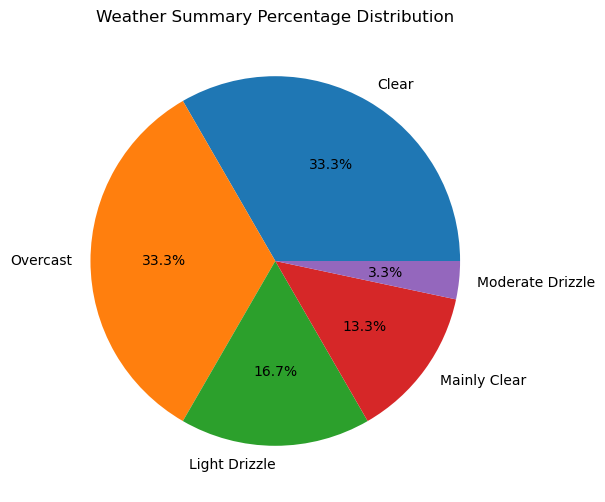

In [115]:
print("Percentages of each unique value of weather summary features:")

percentages = df['weather_summary'].value_counts(normalize=True) * 100
print(percentages)

percentages.plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Weather Summary Percentage Distribution")
plt.ylabel('')
plt.show()



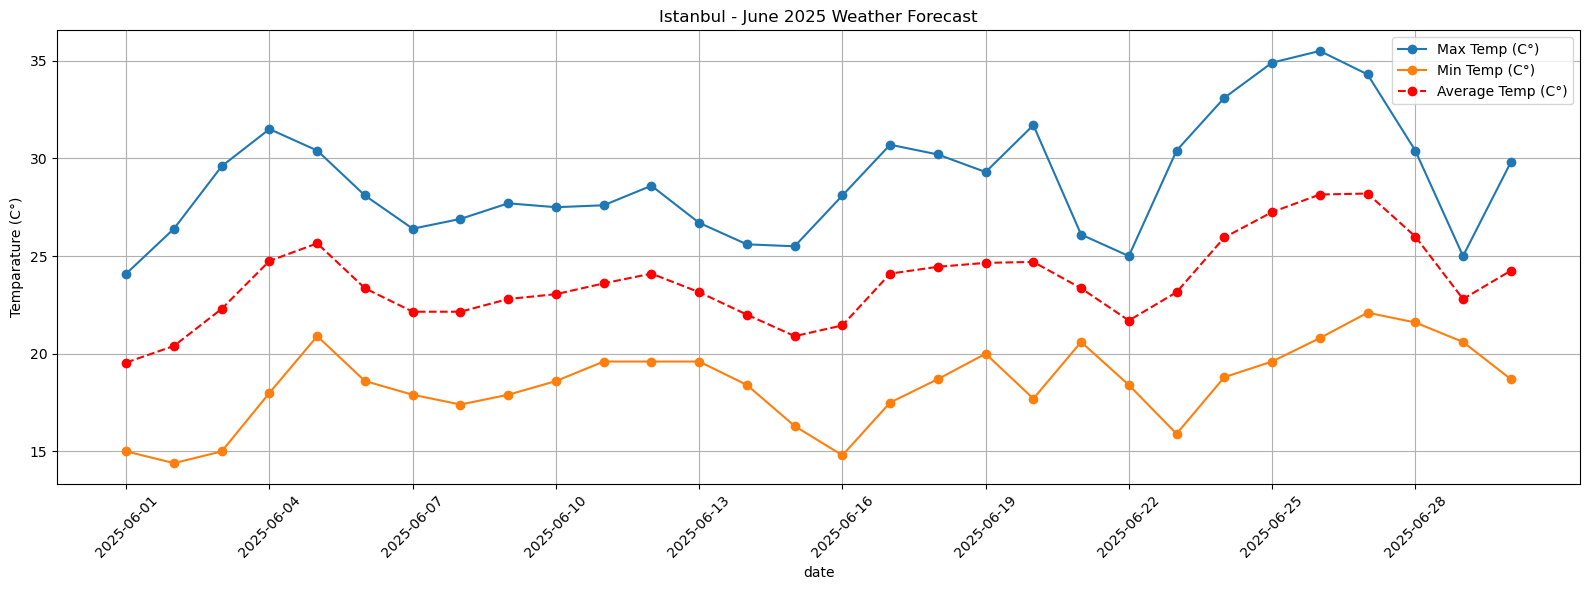

In [11]:
plt.figure(figsize= (16,6))
plt.plot( df["date"], df["temp_max"] , label="Max Temp (C°)" , marker= "o")
plt.plot( df["date"], df["temp_min"], label="Min Temp (C°)", marker="o")
plt.plot( df["date"], df["avg_temp"], label="Average Temp (C°)" , marker="o", color="red", linestyle="--")
plt.title("Istanbul - June 2025 Weather Forecast")
plt.xlabel("date")
plt.ylabel("Temparature (C°)")
plt.xticks(df["date"][::3], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

In [13]:
print(df["temp_max"].describe())

print(df["temp_min"].describe())

print(df["avg_temp"].describe())

count    30.000000
mean     28.903333
std       3.026604
min      24.100000
25%      26.475000
50%      28.350000
75%      30.400000
max      35.500000
Name: temp_max, dtype: float64
count    30.000000
mean     18.433333
std       2.034417
min      14.400000
25%      17.550000
50%      18.600000
75%      19.600000
max      22.100000
Name: temp_min, dtype: float64
count    30.000000
mean     23.668333
std       2.105350
min      19.550000
25%      22.187500
50%      23.350000
75%      24.687500
max      28.200000
Name: avg_temp, dtype: float64


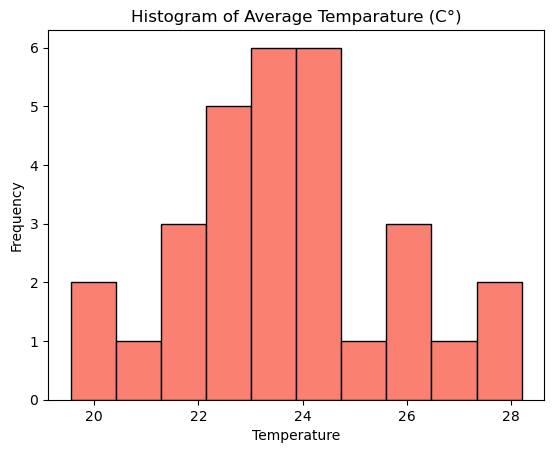

In [15]:
plt.hist(df["avg_temp"], bins=10, color="salmon", edgecolor="black")
plt.title("Histogram of Average Temparature (C°)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

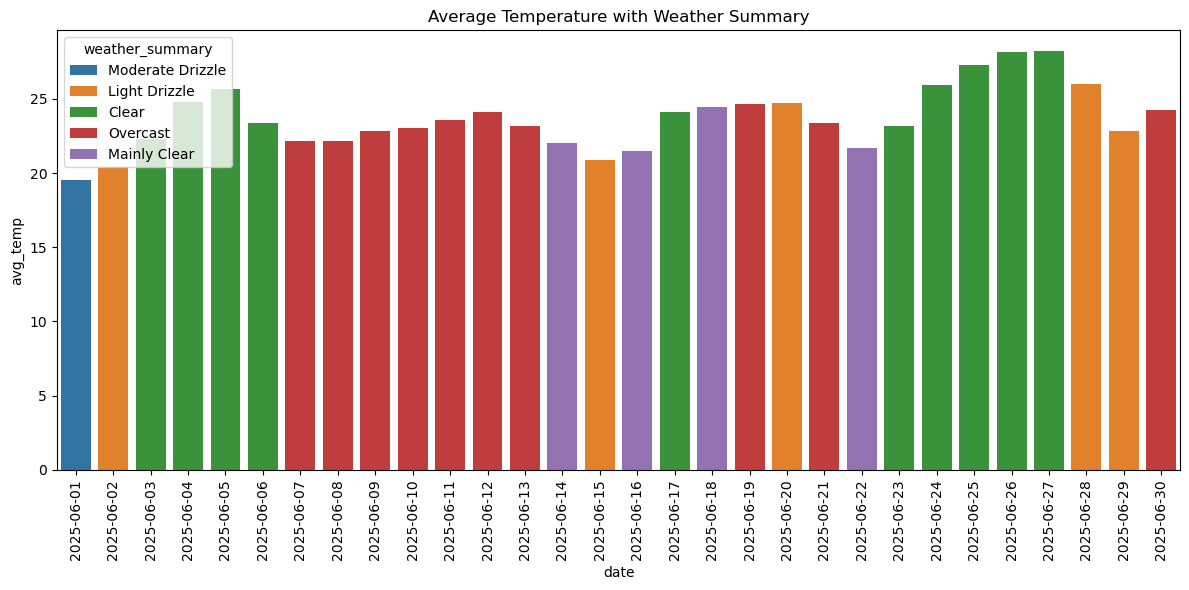

In [17]:

df["date"] = pd.to_datetime(df["date"])
plt.figure(figsize=(12,6))
sns.barplot(data=summary_df, x="date", y="avg_temp", hue="weather_summary", dodge=False)
plt.xticks(rotation=90)
plt.title("Average Temperature with Weather Summary")
plt.tight_layout()

plt.show()

In [21]:
avg_wind_speed=np.mean(df["wind_speed_km_h"])

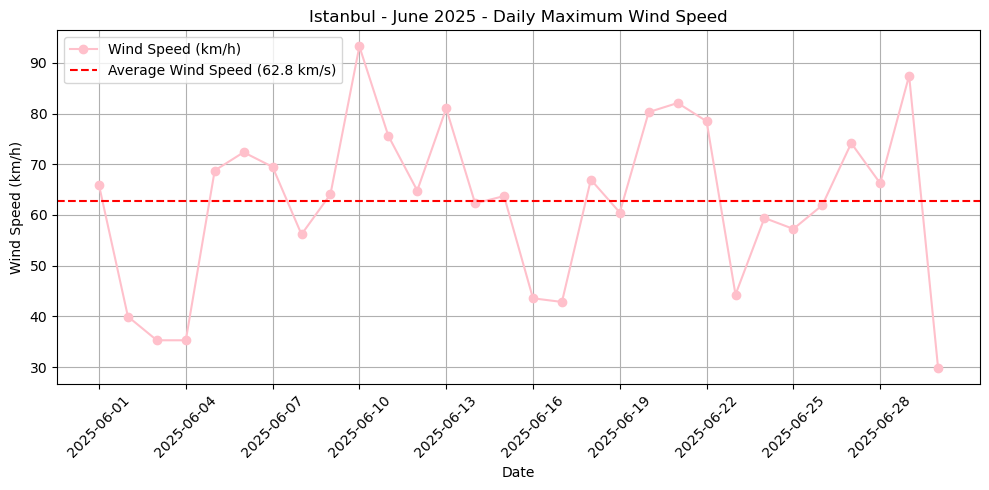

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["wind_speed_km_h"], label="Wind Speed (km/h)" , marker="o" , color="pink")
plt.axhline(y=avg_wind_speed, color="red", linestyle="--", label=f"Average Wind Speed ({avg_wind_speed:.1f} km/s)")
plt.title("Istanbul - June 2025 - Daily Maximum Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(df["date"][::3], rotation=45)
plt.tight_layout()
plt.grid()
plt.legend()

plt.show()

In [25]:
def wind_speed_category(speed):
    if speed<40:
        return "Light"
    elif speed<80 and speed>40:
        return "Moderate"
    else:
        return "Strong"

df["wind_category"]=df["wind_speed_km_h"].apply(wind_speed_category)

df


,date,temp_max,temp_min,humidity_max,humidity_min,wind_speed_m_s,weather_code,wind_speed_km_h,avg_temp,weather_summary,wind_category
0,2025-06-01,24.1,15.0,94,42,18.3,53,65.88,19.55,Moderate Drizzle,Moderate
1,2025-06-02,26.4,14.4,96,31,11.1,51,39.96,20.40,Light Drizzle,Light
2,2025-06-03,29.6,15.0,85,28,9.8,0,35.28,22.30,Clear,Light
3,2025-06-04,31.5,18.0,74,27,9.8,0,35.28,24.75,Clear,Light
4,2025-06-05,30.4,20.9,65,30,19.1,0,68.76,25.65,Clear,Moderate
5,2025-06-06,28.1,18.6,90,41,20.1,0,72.36,23.35,Clear,Moderate
6,2025-06-07,26.4,17.9,92,47,19.3,3,69.48,22.15,Overcast,Moderate
7,2025-06-08,26.9,17.4,94,44,15.6,3,56.16,22.15,Overcast,Moderate
8,2025-06-09,27.7,17.9,95,31,17.8,3,64.08,22.80,Overcast,Moderate
9,2025-06-10,27.5,18.6,98,55,25.9,3,93.24,23.05,Overcast,Strong


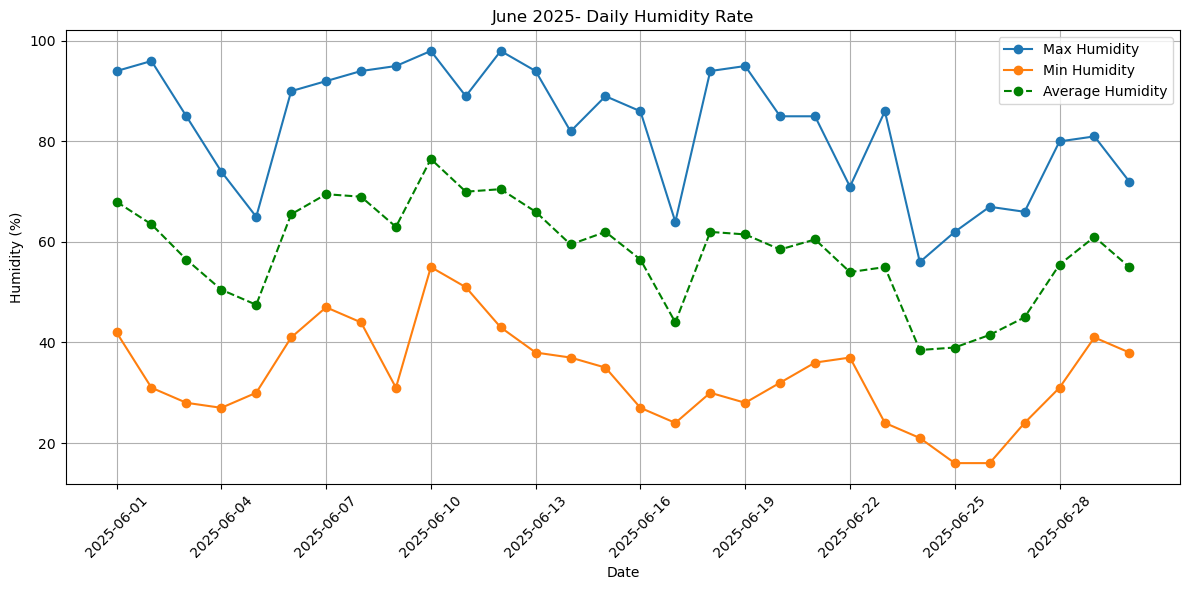

In [27]:
df["avg_humidity"]= (df["humidity_max"]+ df["humidity_min"])/2
plt.figure(figsize=(12,6))
plt.title("June 2025- Daily Humidity Rate")
plt.plot(df["date"] ,df["humidity_max"], label="Max Humidity", marker="o")
plt.plot(df["date"] ,df["humidity_min"], label="Min Humidity", marker="o")
plt.plot(df["date"] ,df["avg_humidity"], label="Average Humidity", marker="o", color="green", linestyle="--" )
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(df["date"][::3], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [95]:
df["avg_temp"]= (df["temp_max"]+ df["temp_min"])/2
correlation_temp_humidity= df["avg_temp"].corr(df["avg_humidity"])
print(f"Correlation between temperature and humidity : {correlation_temp_humidity:.2f}")

Correlation between temperature and humidity : -0.65


<Figure size 1200x600 with 0 Axes>

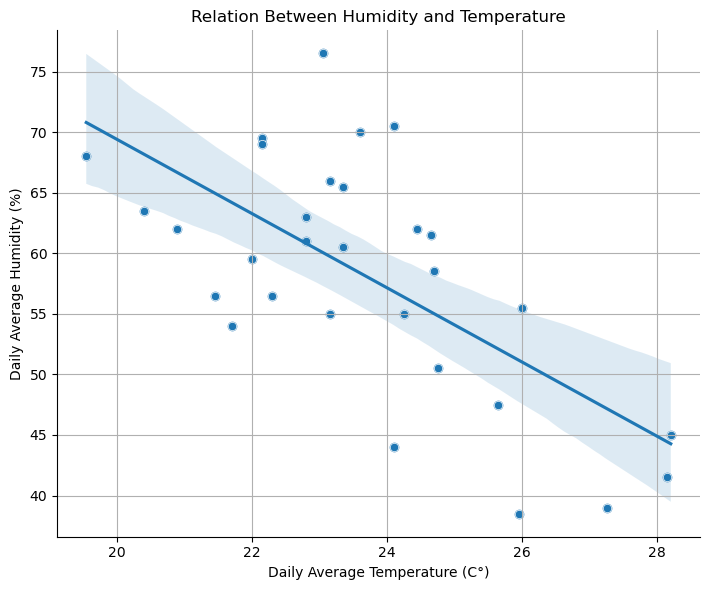

In [63]:
plt.figure(figsize=(12,6))
sns.lmplot(data=df, x="avg_temp", y="avg_humidity", height=6, aspect=1.2)
sns.scatterplot(x=df["avg_temp"], y=df["avg_humidity"])
plt.title("Relation Between Humidity and Temperature")
plt.grid()
plt.xlabel("Daily Average Temperature (C°)")
plt.ylabel("Daily Average Humidity (%)")
plt.tight_layout()
plt.show()

In [89]:
correlation_humidity_wind=df["avg_humidity"].corr(df["wind_speed_km_h"])
print(f"correlation between wind speed and humidity: {correlation_humidity_wind:.2f}")

correlation between wind speed and humidity: 0.35


In [93]:
correlation_wind_temp=df["avg_temp"].corr(df["wind_speed_km_h"])
print(f"correlation between wind speed and temperature : {correlation_wind_temp:.2f}")

correlation between wind speed and temperature : 0.06
